In [109]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np

In [110]:
data_df = pd.read_csv("Resources/DataScience_salaries_2024.csv")
data_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L


In [111]:
year_sort_df = data_df.sort_values('work_year').reset_index(drop=True)
year_sort_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,EN,PT,ML Engineer,14000,EUR,15966,DE,100,DE,S
1,2020,MI,FT,Business Data Analyst,95000,USD,95000,US,0,US,M
2,2020,EN,FT,Data Analyst,91000,USD,91000,US,100,US,L
3,2020,MI,FT,Data Engineer,88000,GBP,112872,GB,50,GB,L
4,2020,EX,FT,Managing Director Data Science,300000,USD,300000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...
14833,2024,MI,FT,Machine Learning Engineer,210100,USD,210100,US,0,US,M
14834,2024,MI,FT,Machine Learning Engineer,210100,USD,210100,US,0,US,M
14835,2024,MI,FT,Machine Learning Engineer,210100,USD,210100,US,0,US,M
14836,2024,MI,FT,Data Engineer,210100,USD,210100,US,0,US,M


In [133]:
clean_df = year_sort_df[['work_year', 'experience_level', 'employment_type', 'job_title',
                         'salary_in_usd', 'employee_residence','remote_ratio', 'company_location', 'company_size']]
#clean_df['salary_in_usd'] = clean_df['salary_in_usd'].map('${:,.2f}'.format)
bonus_df = clean_df.rename(columns={"work_year":"Working Year", "experience_level":"Experience Level", 
                                    "employment_type":"Employment Type", "job_title":"Job Title", 
                                    "salary_in_usd":"Salary (USD)", "employee_residence":"Employee Residence (Country)",
                                    "remote_ratio":"Remote Work Ratio", "company_location":"Location of Company (Country)",
                                   "company_size":"Size of Company"})
#bonus_df = bonus_df.sort_values("Salary (USD)", ascending=False)
bonus_df.head()

,Working Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
0,2020,EN,PT,ML Engineer,15966,DE,100,DE,S
1,2020,MI,FT,Business Data Analyst,95000,US,0,US,M
2,2020,EN,FT,Data Analyst,91000,US,100,US,L
3,2020,MI,FT,Data Engineer,112872,GB,50,GB,L
4,2020,EX,FT,Managing Director Data Science,300000,US,100,US,L


In [135]:
emp_type = bonus_df.groupby('Employment Type')
count_emp_type = emp_type['Employment Type'].count()
count_emp_type

Employment Type
CT       26
FL       13
FT    14772
PT       27
Name: Employment Type, dtype: int64

In [137]:
average_salaries_per_year = bonus_df.groupby('Working Year')['Salary (USD)'].mean()
print(round(average_salaries_per_year),2)

Working Year
2020    102251.0
2021     99922.0
2022    134404.0
2023    153733.0
2024    151510.0
Name: Salary (USD), dtype: float64 2


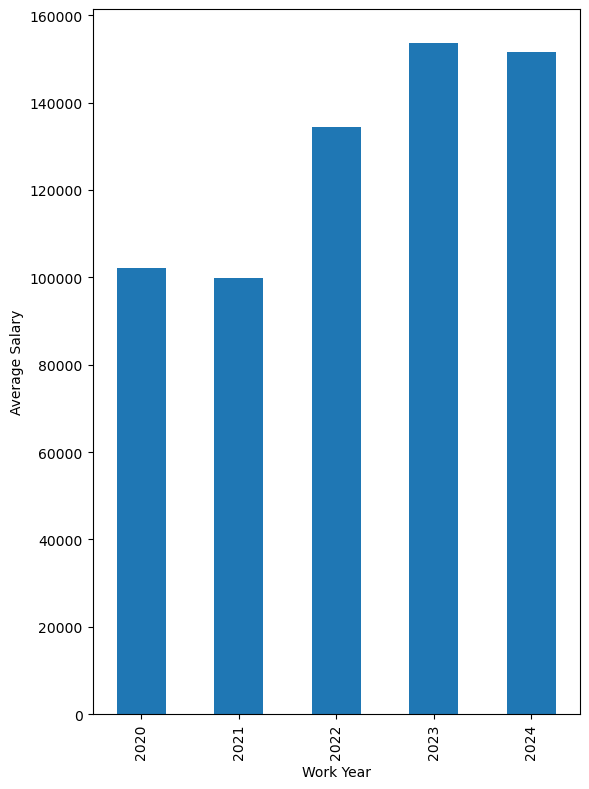

In [139]:
salaries_chart = average_salaries_per_year.plot(kind='bar', figsize=(6,8))
salaries_chart.set_xlabel("Work Year")
salaries_chart.set_ylabel("Average Salary")
plt.tight_layout()
plt.show()

In [141]:
salary_by_country = bonus_df.groupby('Location of Company (Country)')['Salary (USD)'].mean()
print(round(salary_by_country))

Location of Company (Country)
AD     50745.0
AE     86000.0
AM     50000.0
AR     69571.0
AS     31684.0
        ...   
TR     23095.0
UA    105600.0
US    157410.0
VN     63000.0
ZA     55787.0
Name: Salary (USD), Length: 77, dtype: float64


In [143]:
job_counts = bonus_df['Job Title'].value_counts()
job_title_df = bonus_df[bonus_df['Job Title'].isin(job_counts.index[job_counts >= 25])]
job_title_df.head()

,Working Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
0,2020,EN,PT,ML Engineer,15966,DE,100,DE,S
2,2020,EN,FT,Data Analyst,91000,US,100,US,L
3,2020,MI,FT,Data Engineer,112872,GB,50,GB,L
6,2020,MI,FT,Data Analyst,85000,US,100,US,L
7,2020,SE,FT,Data Scientist,412000,US,100,US,L


In [145]:
average_salaries_jobs = job_title_df.groupby('Job Title')['Salary (USD)'].mean()
average_salaries_jobs

Job Title
AI Architect                                255142.357143
AI Engineer                                 164842.371429
Analytics Engineer                          159616.397022
Applied Scientist                           190350.707572
BI Analyst                                  120393.511628
BI Developer                                108443.928571
Business Intelligence                       153824.460000
Business Intelligence Analyst               110595.605442
Business Intelligence Developer             100395.959184
Business Intelligence Engineer              140673.973913
Computer Vision Engineer                    172677.062500
Data Analyst                                108031.788945
Data Analytics Manager                      135825.392857
Data Architect                              163499.723577
Data Developer                               97747.633333
Data Engineer                               146780.174257
Data Manager                                106890.132979
Data

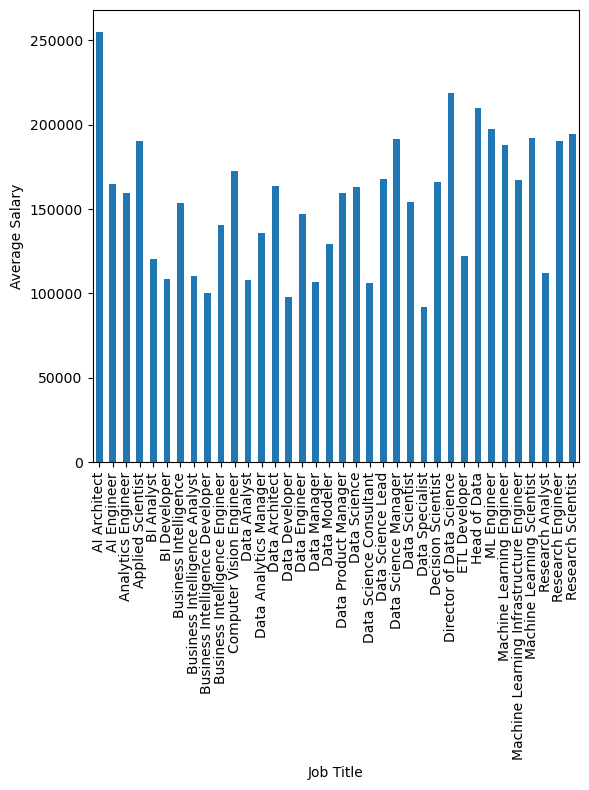

In [147]:
job_title_chart = average_salaries_jobs.plot(kind='bar', figsize=(6,8))
job_title_chart.set_xlabel("Job Title")
job_title_chart.set_ylabel("Average Salary")
plt.tight_layout()
plt.show()

In [120]:
##Visual Idea
#  Stacked column chart showing Work experience level per Job Title vs Average Salary

In [121]:
work_exp_df = job_title_df.sort_values(['Experience Level', 'Job Title'])
work_exp_df = work_exp_df.groupby('Working Year')
work_exp_df.head(50)

,Working Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
11537,2024,EN,FT,AI Engineer,44444,IT,50,IT,L
4782,2023,EN,FT,AI Engineer,35000,HR,100,DE,M
4809,2023,EN,FT,AI Engineer,21593,PT,50,PT,L
10087,2023,EN,FT,Analytics Engineer,156450,US,100,US,M
13570,2024,EN,FT,Analytics Engineer,132500,US,0,US,M
...,...,...,...,...,...,...,...,...,...
31,2020,SE,FT,Data Science Manager,190200,US,100,US,M
7,2020,SE,FT,Data Scientist,412000,US,100,US,L
43,2020,SE,FT,Data Scientist,120000,US,50,US,L
8,2020,SE,FT,Data Scientist,91237,AT,0,AT,S


In [161]:
sal_exp_20_en = bonus_df.loc[(bonus_df["Working Year"] == 2020) & (bonus_df["Experience Level"] == "EN"),:]
sal_exp_20_en.head()

,Working Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
0,2020,EN,PT,ML Engineer,15966,DE,100,DE,S
2,2020,EN,FT,Data Analyst,91000,US,100,US,L
9,2020,EN,FT,Data Analyst,72000,US,100,US,L
10,2020,EN,FT,Big Data Engineer,70000,US,100,US,L
16,2020,EN,CT,Staff Data Analyst,44753,CA,50,CA,L


In [163]:
sal_exp_20 = bonus_df.loc[(bonus_df["Working Year"] == 2020),:]
average_salaries_exp = sal_exp_20.groupby('Experience Level')['Salary (USD)'].mean()
average_salaries_exp

Experience Level
EN     69840.666667
EX    179958.250000
MI     91870.935484
SE    138648.894737
Name: Salary (USD), dtype: float64

In [175]:
country_counts = bonus_df['Location of Company (Country)'].value_counts()
job_counter = bonus_df['Job Title'].value_counts()
cleaned_df = bonus_df[bonus_df['Location of Company (Country)'].isin(country_counts.index[country_counts >= 15])]
new_clean_df = cleaned_df[cleaned_df['Job Title'].isin(job_counter.index[job_counter >= 15])]


new_clean_df.head()

,Working Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
0,2020,EN,PT,ML Engineer,15966,DE,100,DE,S
1,2020,MI,FT,Business Data Analyst,95000,US,0,US,M
2,2020,EN,FT,Data Analyst,91000,US,100,US,L
3,2020,MI,FT,Data Engineer,112872,GB,50,GB,L
6,2020,MI,FT,Data Analyst,85000,US,100,US,L


In [235]:
sal_exp_all = new_clean_df.groupby(['Working Year','Experience Level'])['Salary (USD)'].mean().round(2)
pd.DataFrame(sal_exp_all)

Salary (USD)
Working Year Experience Level              
2020         EN                    76176.47
             EX                   202416.50
             MI                   101626.43
             SE                   152767.38
2021         EN                    67536.15
             EX                   162768.83
             MI                    94630.19
             SE                   121480.31
2022         EN                    86492.79
             EX                   195257.39
             MI                   106459.43
             SE                   148170.88
2023         EN                    93423.53
             EX                   190121.81
             MI                   126644.49
             SE                   166336.75
2024         EN                   100117.69
             EX                   199618.44
             MI                   137919.84
             SE                   169266.87

In [179]:
sal_exp_job = new_clean_df.groupby(['Working Year','Experience Level','Job Title'])['Salary (USD)'].mean()
sal_exp_job

Working Year  Experience Level  Job Title                 
2020          EN                Business Data Analyst         100000.000000
                                Data Analyst                   58427.000000
                                Data Engineer                  54742.000000
                                Data Scientist                 61646.200000
                                ML Engineer                    15966.000000
                                                                  ...      
2024          SE                Machine Learning Scientist    172041.781250
                                Prompt Engineer               237921.125000
                                Research Analyst              135908.333333
                                Research Engineer             199863.068966
                                Research Scientist            225079.568966
Name: Salary (USD), Length: 404, dtype: float64

In [185]:
new_clean_df['Job Title'].value_counts()

Job Title
Data Engineer                               3125
Data Scientist                              2958
Data Analyst                                2161
Machine Learning Engineer                   1511
Research Scientist                           472
Analytics Engineer                           401
Applied Scientist                            380
Data Architect                               367
Research Engineer                            274
Business Intelligence Engineer               228
Data Science                                 204
Data Manager                                 188
ML Engineer                                  160
Business Intelligence Analyst                147
Machine Learning Scientist                   122
Data Science Manager                         112
Research Analyst                             105
AI Engineer                                  100
BI Developer                                  81
Data Specialist                               78
Data Scien

In [187]:
new_clean_df["Location of Company (Country)"].value_counts()

Location of Company (Country)
US    12748
GB      616
CA      371
ES      121
DE       80
FR       56
AU       48
IN       40
NL       24
PT       22
BR       20
CO       16
LT       16
ZA       15
MX       14
Name: count, dtype: int64

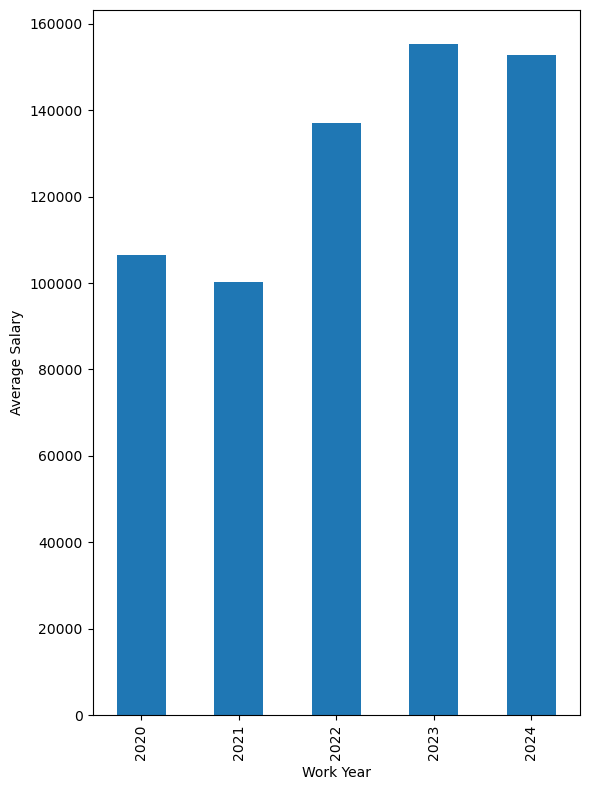

In [189]:
avg_yearly_sal = new_clean_df.groupby('Working Year')['Salary (USD)'].mean()

yearly_sal_chart = avg_yearly_sal.plot(kind='bar', figsize=(6,8))
yearly_sal_chart.set_xlabel("Work Year")
yearly_sal_chart.set_ylabel("Average Salary")
plt.tight_layout()
plt.show()

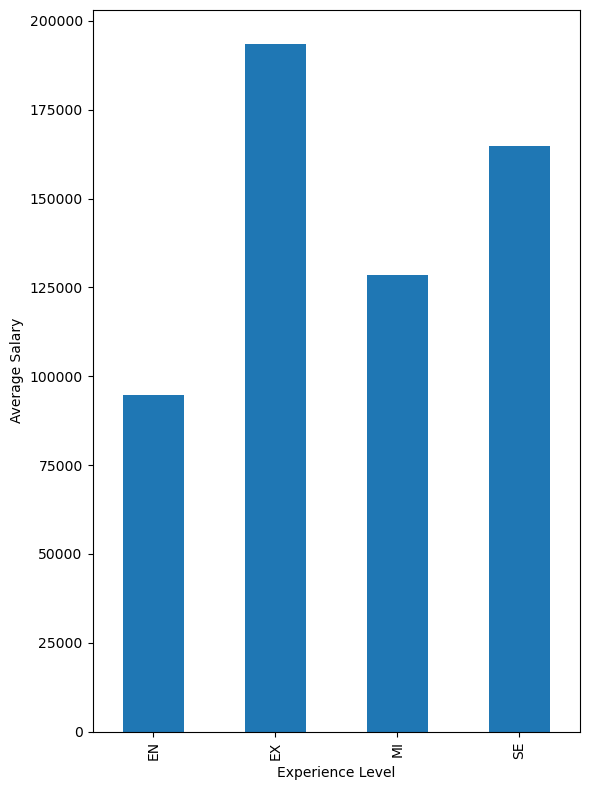

In [237]:
avg_sal_exp = new_clean_df.groupby('Experience Level')['Salary (USD)'].mean()

exp_sal_chart = avg_sal_exp.plot(kind='bar', figsize=(6,8))
exp_sal_chart.set_xlabel("Experience Level")
exp_sal_chart.set_ylabel("Average Salary")
plt.tight_layout()
plt.savefig("Resources/Overall_Salary_WrkExp.png")
plt.show()

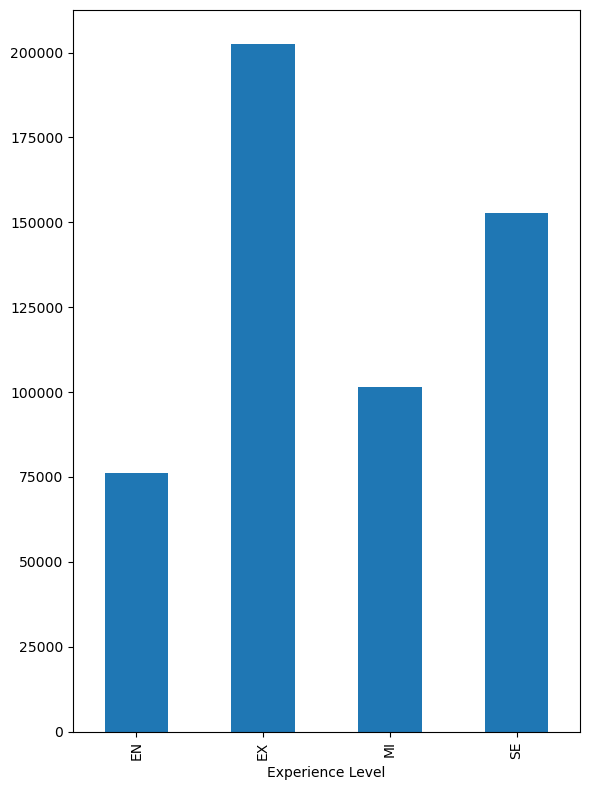

In [211]:
sal_exp_20 = new_clean_df.loc[(bonus_df["Working Year"] == 2020),:]
average_salaries_exp = sal_exp_20.groupby('Experience Level')['Salary (USD)'].mean()
average_salaries_exp

exp_sal_20 = average_salaries_exp.plot(kind='bar', figsize=(6,8))
exp_sal_chart.set_xlabel("Experience Level")
exp_sal_chart.set_ylabel("Average Salary")
plt.tight_layout()
plt.savefig("Resources/2020_Salary_WrkExp.png")
plt.show()

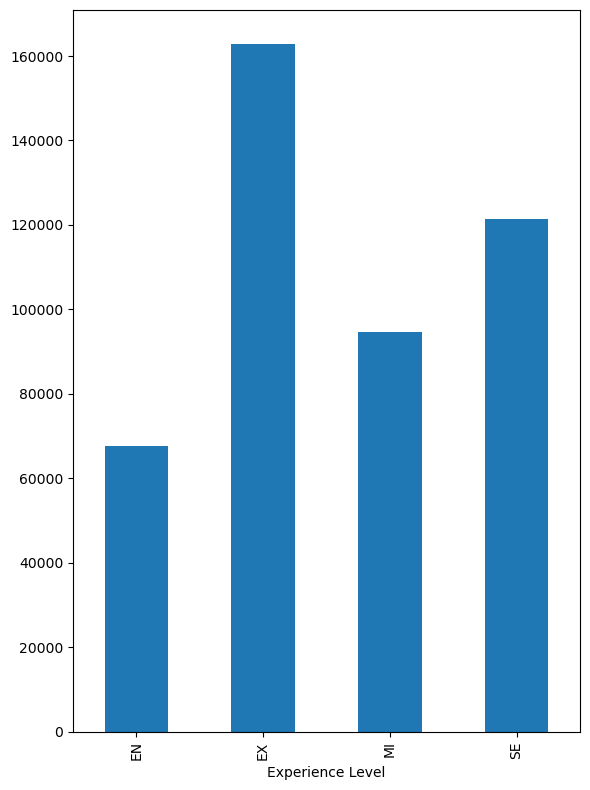

In [213]:
sal_exp_21 = new_clean_df.loc[(bonus_df["Working Year"] == 2021),:]
avg_sal_exp_21 = sal_exp_21.groupby('Experience Level')['Salary (USD)'].mean()

exp_sal_21 = avg_sal_exp_21.plot(kind='bar', figsize=(6,8))
exp_sal_chart.set_xlabel("Experience Level")
exp_sal_chart.set_ylabel("Average Salary")
plt.tight_layout()
plt.savefig("Resources/2021_Salary_WrkExp.png")
plt.show()

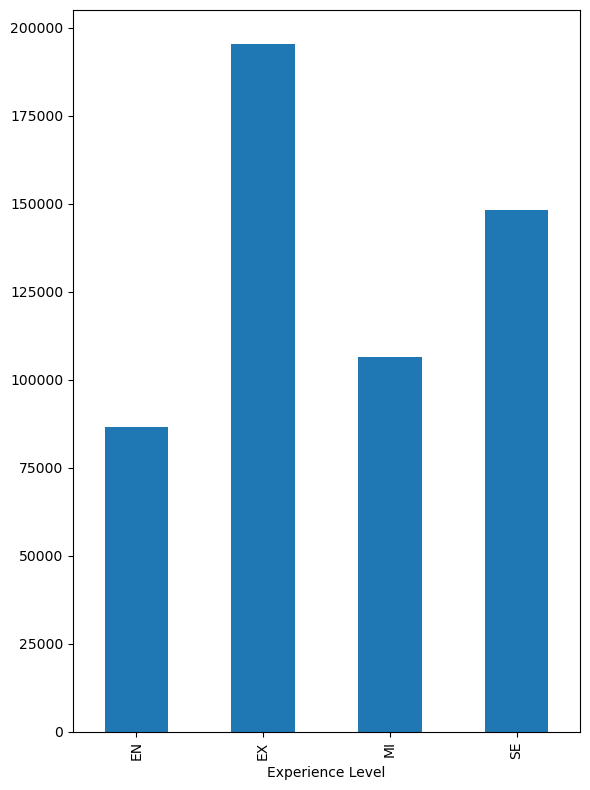

In [215]:
sal_exp_22 = new_clean_df.loc[(bonus_df["Working Year"] == 2022),:]
avg_sal_exp_22 = sal_exp_22.groupby('Experience Level')['Salary (USD)'].mean()

exp_sal_22 = avg_sal_exp_22.plot(kind='bar', figsize=(6,8))
exp_sal_chart.set_xlabel("Experience Level")
exp_sal_chart.set_ylabel("Average Salary")
plt.tight_layout()
plt.savefig("Resources/2022_Salary_WrkExp.png")
plt.show()

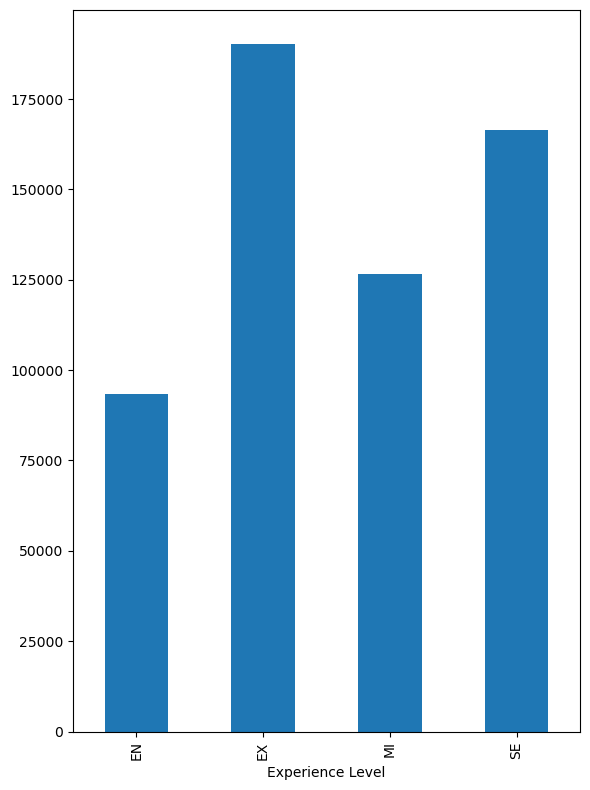

In [217]:
sal_exp_23 = new_clean_df.loc[(bonus_df["Working Year"] == 2023),:]
avg_sal_exp_23 = sal_exp_23.groupby('Experience Level')['Salary (USD)'].mean()

exp_sal_23 = avg_sal_exp_23.plot(kind='bar', figsize=(6,8))
exp_sal_chart.set_xlabel("Experience Level")
exp_sal_chart.set_ylabel("Average Salary")
plt.tight_layout()
plt.savefig("Resources/2023_Salary_WrkExp.png")
plt.show()

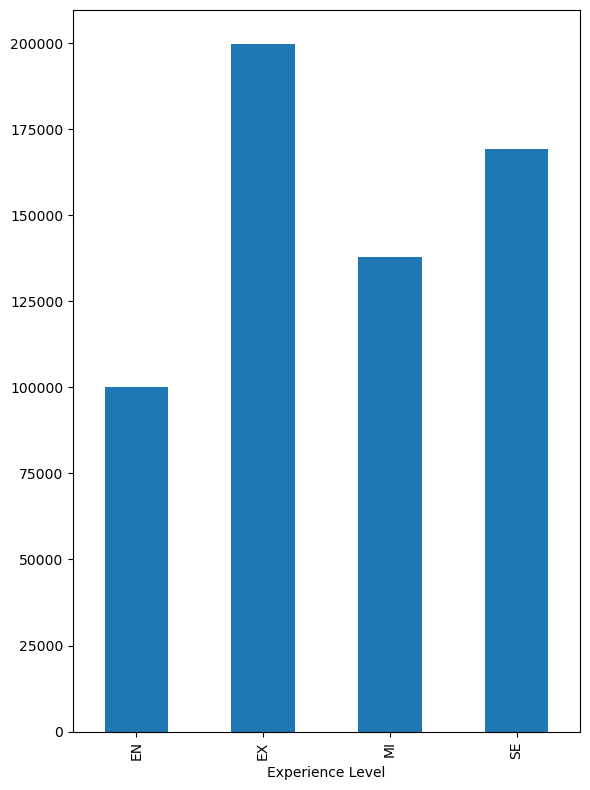

In [223]:
sal_exp_24 = new_clean_df.loc[(bonus_df["Working Year"] == 2024),:]
avg_sal_exp_24 = sal_exp_24.groupby('Experience Level')['Salary (USD)'].mean()

exp_sal_24 = avg_sal_exp_24.plot(kind='bar', figsize=(6,8))
exp_sal_chart.set_xlabel("Experience Level")
exp_sal_chart.set_ylabel("Average Salary")
plt.tight_layout()
plt.savefig("Resources/2024_Salary_WrkExp.png")
plt.show()